# Question 3

In [2]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from IPython.display import Video

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

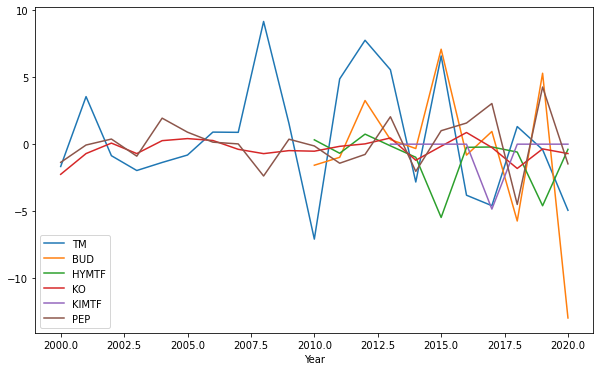

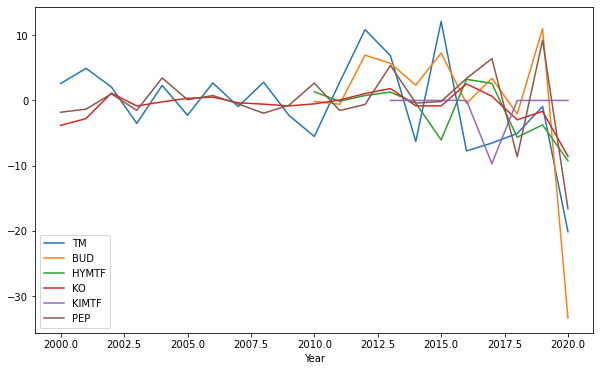

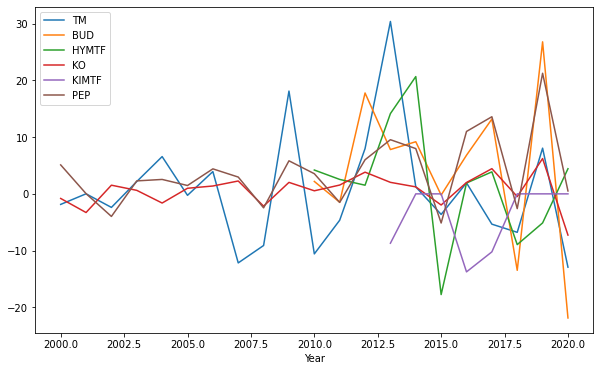

In [3]:
dat1 = pd.read_csv('../DataMadness/DataSets/Delta1.csv')
dat2 = pd.read_csv('../DataMadness/DataSets/Delta2.csv')
dat3 = pd.read_csv('../DataMadness/DataSets/Delta3.csv')
dat1 = dat1.set_index('Year')
dat2 = dat2.set_index('Year')
dat3 = dat3.set_index('Year')
dat1.plot()
dat2.plot()
dat3.plot()


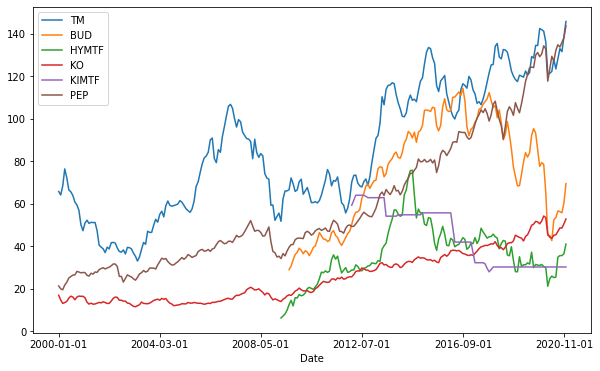

In [4]:
all_dat = pd.read_csv('../DataMadness/DataSets/All_Companies.csv')
all_dat = all_dat.set_index('Date')
all_dat.plot()


In [5]:
ad = pd.read_csv('../DataMadness/DataSets/superbowl-ads(sorted).csv')
ad = ad.drop(['superbowl_ads_dot_com_url','youtube_url'],axis=1)
ad = ad.set_index('year')
ad = ad[(ad['brand'] != 'E-Trade') & (ad['brand'] != 'NFL')]
ad

,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
year,,,,,,,,
2000,Budweiser,True,True,False,False,False,False,False
2000,Bud Light,True,True,False,False,True,False,False
2000,Budweiser,True,False,False,False,False,True,False
2000,Bud Light,True,False,False,False,True,True,True
2000,Budweiser,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2020,Kia,False,False,False,True,False,False,False
2020,Hynudai,True,True,False,True,False,True,False
2020,Budweiser,False,True,True,True,True,False,False


In [6]:
name = ad.drop_duplicates(subset=['brand'])
d = ['BUD','BUD','PEP','PEP','TM','KO','HYMTF','KIMTF']
stock_name = pd.Series(data=d, index=name['brand'])
print(stock_name)
def stock(name):
    return stock_name.loc[name]
ad['stock_name'] = ad['brand'].map(stock)
ad

brand
Budweiser      BUD
Bud Light      BUD
Pepsi          PEP
Doritos        PEP
Toyota          TM
Coca-Cola       KO
Hynudai      HYMTF
Kia          KIMTF
dtype: object


,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex,stock_name
year,,,,,,,,,
2000,Budweiser,True,True,False,False,False,False,False,BUD
2000,Bud Light,True,True,False,False,True,False,False,BUD
2000,Budweiser,True,False,False,False,False,True,False,BUD
2000,Bud Light,True,False,False,False,True,True,True,BUD
2000,Budweiser,True,True,False,False,False,False,False,BUD
...,...,...,...,...,...,...,...,...,...
2020,Kia,False,False,False,True,False,False,False,KIMTF
2020,Hynudai,True,True,False,True,False,True,False,HYMTF
2020,Budweiser,False,True,True,True,True,False,False,BUD


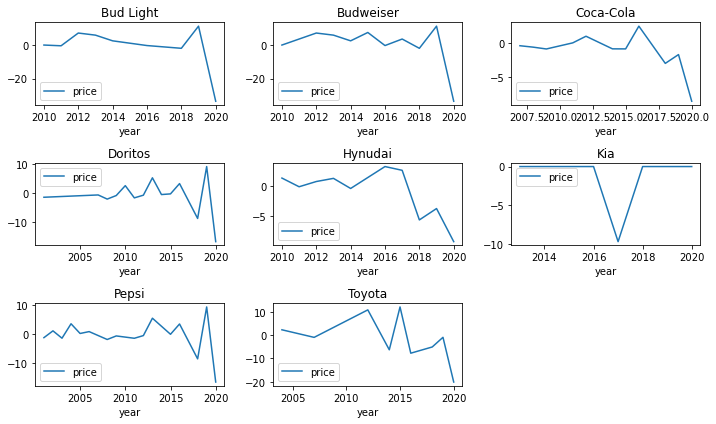

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
price = []
for index, row in ad.iterrows():
    price.append(dat2.loc[index, row['stock_name']])
ad['price'] = price
ad = ad.dropna()
brands = ad.groupby(['brand'])
plt.figure()

# Iterate through continents

for i, (brand_name, price) in enumerate(brands):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(3, 3, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    price.plot(ax=ax)
    # set the title
    ax.set_title(brand_name)

plt.tight_layout()
plt.show()

In [8]:
SLR = sm.ols("price ~ celebrity + danger + use_sex", data=ad).fit()
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     8.638
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           2.62e-05
Time:                        12:26:49   Log-Likelihood:                -466.10
No. Observations:                 147   AIC:                             940.2
Df Residuals:                     143   BIC:                             952.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8121      0.711      2.548      0.012       0.406       3.218
celebrity[T.True]    -4.4061      1.028     -4.285      0.000      -6.439      -2.374
danger[T.True]       -2.3274      1.029     -2.262      0.025      -4.361      -0.293
use_sex[T.True]       2.4629      1.163      2.118      0.036       0.164       4.761
==============================================================================
Omnibus:                       65.134   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.767
Skew:                          -1.497   Prob(JB):                     1.66e-74
Kurtosis:                       9.819   Cond. No.                         2.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
ad_no_kia = ad[ad['brand'] != 'Kia']
nk_r = sm.ols("price ~ celebrity + danger + use_sex", data=ad_no_kia).fit()
nk_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.295
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.24e-05
Time:                        12:26:49   Log-Likelihood:                -437.71
No. Observations:                 137   AIC:                             883.4
Df Residuals:                     133   BIC:                             895.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8860      0.749      2.517      0.013       0.404       3.368
celebrity[T.True]    -4.7802      1.114     -4.289      0.000      -6.985      -2.576
danger[T.True]       -2.3564      1.097     -2.147      0.034      -4.527      -0.186
use_sex[T.True]       2.6862      1.250      2.149      0.033       0.213       5.159
==============================================================================
Omnibus:                       57.160   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.744
Skew:                          -1.409   Prob(JB):                     8.83e-58
Kurtosis:                       9.171   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

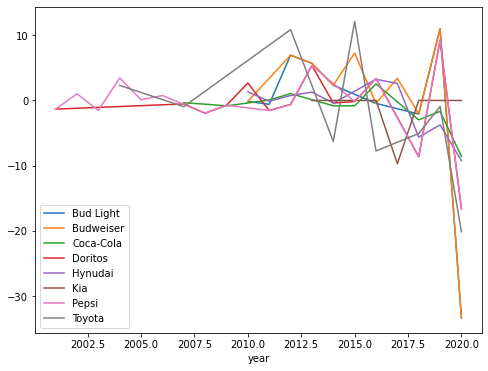

In [10]:
brnds = ad[['brand','price']].groupby(['brand'])

fig, ax = plt.subplots(figsize=(8,6))
for label, df in brnds:
    df.price.plot(ax=ax, label=label)
plt.legend()

In [51]:
grp = ad.groupby('brand')['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
tmp = pd.DataFrame(grp.sum())
size = grp.size()
print(size)
for index, row in tmp.iterrows():
    print(row.divide(size.loc[index])
tmp

brand
Bud Light    19
Budweiser    17
Coca-Cola    21
Doritos      25
Hynudai      19
Kia          10
Pepsi        25
Toyota       11
dtype: int64


<ipython-input-51-3a48517c0c3f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp = ad.groupby('brand')['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']


KeyError: "None of [Float64Index([16.0, 17.0, 2.0, 7.0, 7.0, 8.0, 5.0], dtype='float64', name='brand')] are in the [index]"